# Isolation Forest

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import IsolationForest
from ucimlrepo import fetch_ucirepo

In [2]:
# Fetch dataset from UCI repository
air_quality = fetch_ucirepo(id=360)

In [3]:
# Convert to DataFrame
data = air_quality.data.features

# Select features
features = data[['CO(GT)', 'C6H6(GT)', 'NOx(GT)', 'NO2(GT)']]

# Drop rows with missing values (-200)
features = features.replace(-200, np.nan)
features = features.dropna()

print(features.shape)
features.head()

(6941, 4)


,CO(GT),C6H6(GT),NOx(GT),NO2(GT)
0,2.6,11.9,166.0,113.0
1,2.0,9.4,103.0,92.0
2,2.2,9.0,131.0,114.0
3,2.2,9.2,172.0,122.0
4,1.6,6.5,131.0,116.0


In [4]:
# Parameters
n_estimators = 100  # Number of trees
contamination = 0.01  # Expected proportion of anomalies
sample_size = 256  # Number of samples used to train each tree

In [5]:
# Train Isolation Forest
iso_forest = IsolationForest(n_estimators=n_estimators,
                            contamination=contamination,
                            max_samples=sample_size,
                            random_state=42)
iso_forest.fit(features)

IsolationForest(contamination=0.01, max_samples=256, random_state=42)

In [6]:
# Calculate anomaly scores and classify anomalies
data = data.loc[features.index].copy()
data['anomaly_score'] = iso_forest.decision_function(features)
data['anomaly'] = iso_forest.predict(features)

data['anomaly'].value_counts()

anomaly
 1    6871
-1      70
Name: count, dtype: int64

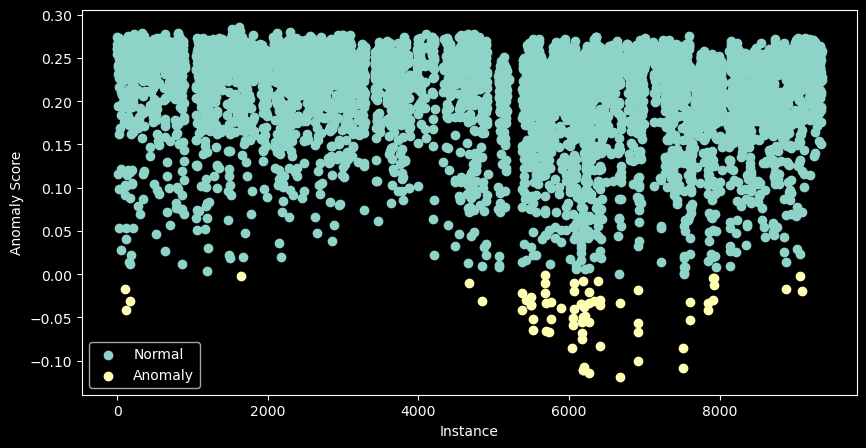

In [7]:
# Visualization of the results
plt.figure(figsize=(10, 5))

# Plot normal instances
normal = data[data['anomaly'] == 1]
plt.scatter(normal.index, normal['anomaly_score'], label='Normal')

# Plot anomalies
anomalies = data[data['anomaly'] == -1]
plt.scatter(anomalies.index, anomalies['anomaly_score'], label='Anomaly')
plt.xlabel("Instance")
plt.ylabel("Anomaly Score")
plt.legend()
plt.show()

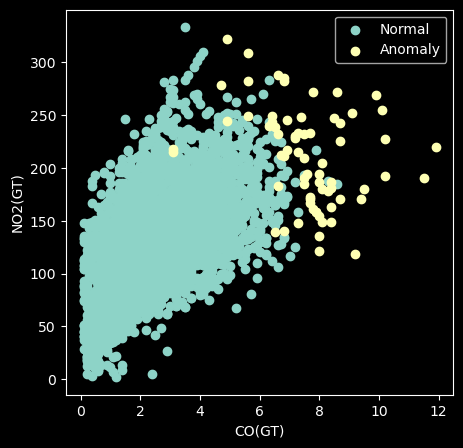

In [8]:
# Visualization of the results
plt.figure(figsize=(5, 5))

# Plot non-anomalies then anomalies
plt.scatter(normal['CO(GT)'], normal['NO2(GT)'], label='Normal')
plt.scatter(anomalies['CO(GT)'], anomalies['NO2(GT)'], label='Anomaly')
plt.xlabel("CO(GT)")
plt.ylabel("NO2(GT)")
plt.legend()
plt.show()